In [35]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

The dataset contains medical data alongside the corresponding expenses charged by health insurance providers.

In [36]:
df_insurance = pd.read_csv("insurance.csv")
print(df_insurance.shape)
df_insurance

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows of information, featuring columns for age, gender, BMI, number of children, smoking status, region, and insurance charges

In [37]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The df_insurance dataset doesn't contain any missing values, so it's all set for building a model.

### Step 1: Data Preprocessing

In [38]:
# Convert categorical variables into numerical format
df_processed = pd.get_dummies(df_insurance, columns=['sex', 'smoker', 'region'], drop_first=True)
df_processed

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [39]:
X = df_processed.drop(columns=['charges'])
Y = df_processed['charges']

X represents all the independent variables, while the 'charges' column represents the target variable (Y).

### Step 2: Splitting the Data

In [40]:

#X_train,x_test,Y_train,Y_test = model_selection.train_test_split(X,Y)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)


In [41]:
print('X_train Size',X_train.shape)
print('X_test Size',X_test.shape)
print('Y_train Size',Y_train.shape)
print('Y_test Size',Y_test.shape)

X_train Size (936, 8)
X_test Size (402, 8)
Y_train Size (936,)
Y_test Size (402,)


Default size for the test set is 0.25. This means that 25% of the data will be allocated to the test set, and the remaining 75% will be allocated to the training set.

### Step 3: Model Training

In [42]:

insuarance_Model = LinearRegression()
insuarance_Model.fit(X_train,Y_train)

LinearRegression()


The insurance dataset contained three categorical columns ('sex', 'smoker', 'region'). During the model fitting process, an error occurred with the message 'ValueError: could not convert string to float: 'female''. Now, it is necessary to convert the categorical variables into numerical format.

### Step 4: Model Evaluation

In [43]:
Y_pred = insuarance_Model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4145.450555627586
Mean Squared Error: 33780509.57479164
Root Mean Squared Error: 5812.100272258871
R-squared: 0.7696118054369011


In [44]:
insuarance_Model.score(X_train,Y_train)

0.7423980090600258

Text(0.5, 1.0, 'Actual vs. Predicted')

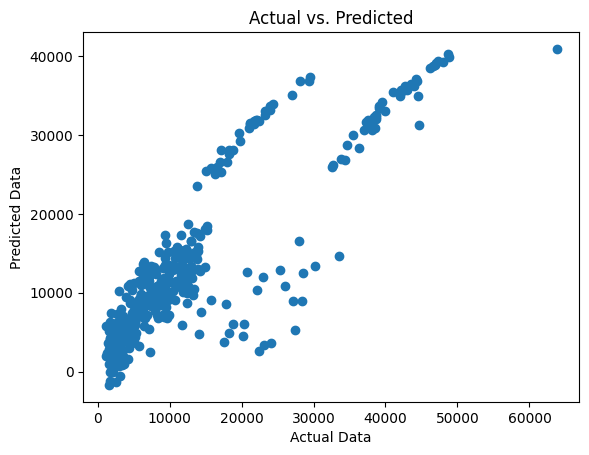

In [45]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual vs. Predicted")